In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

In [2]:
#Volviendo a tomar una recta de la forma y = mx + b
m_i = 1.3
b_i =  3.1
N = 50

In [3]:
data = 10*np.random.rand(N)

In [4]:
y = m_i*data+b_i
yerr = 1.+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)

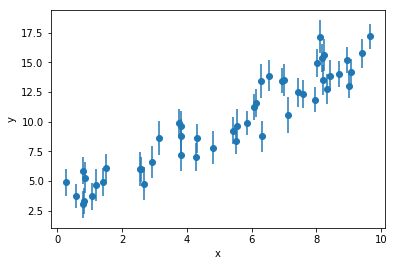

In [5]:
plt.errorbar(data, y,yerr=yerr, fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
def lnlike(theta, x, y, yerr):
    m, b = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2)
    return -0.5*(np.sum((y-model)**2 - np.log(inv_sigma2)))

In [7]:
plist = [0.0,5.0,0.0,5.0]

In [8]:
def lnprior(theta, plist):
    m, b = theta
    if plist[0] < m < plist[1] and plist[2] < b < plist[3]:
        return 0.0
    return -np.inf

In [9]:
x = data
sigma_m = 0.1#tamaño del paso
sigma_b = 0.3#
paso_i = [1.3,3.1]
NS = 1000#Numero de pasos

In [10]:
cadena = [paso_i]
pcadena = []

In [13]:
def mc(pasos, sigma_m,sigma_b, paso_inicial):
    cadena = [paso_inicial]
    pcadena = []
    theta_old = [m_i,b_i]
    for i in range(NS):
        m_new = np.random.normal(m_i,sigma_m)
        b_new = np.random.normal(b_i,sigma_b)
        theta_new = [m_new, b_new]
        p_new = lnlike(theta_new, x, y, yerr)
        p_old = lnlike(theta_old,x, y,yerr)
        #p = lnprior(m_new,b_new)
        p_n = np.exp(p_new - p_old)
        p_n = min(1., p_n)
        if (p_new/p_old>1):
            theta_old = theta_new
        else:
            r = np.random.uniform(0.,1.)
            if (p_n >= r):
                theta_old = theta_new
                cadena.append(theta_new)
                pcadena.append(p_new)
            else:
                cadena.append(theta_old)
                pcadena.append(p_old)
    cadena = np.array(cadena)
    pcadena = np.array(pcadena)
    return cadena, pcadena

In [14]:
cad,pcad = mc(NS, sigma_m,sigma_b, paso_i)

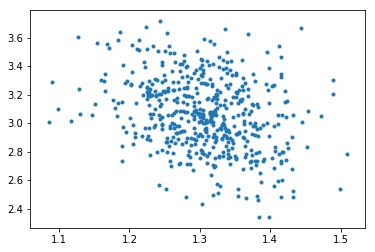

In [16]:
plt.scatter(cad[:,0],cad[:,1],s=None, marker='.')
plt.show()

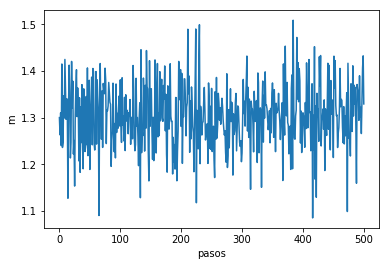

In [17]:
plt.plot(cad[:,0])
plt.ylabel('m')
plt.xlabel('pasos')
plt.show()

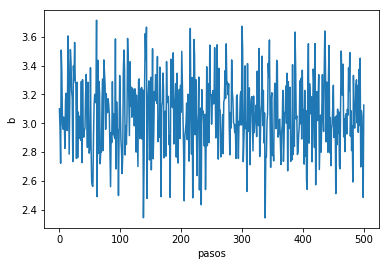

In [18]:
plt.plot(cad[:,1])
plt.ylabel('b')
plt.xlabel('pasos')
plt.show()

(array([  5.,  10.,  26.,  76.,  98., 135.,  87.,  48.,  11.,   5.]),
 array([1.085121  , 1.12746259, 1.16980417, 1.21214576, 1.25448735,
        1.29682893, 1.33917052, 1.38151211, 1.42385369, 1.46619528,
        1.50853687]),
 <a list of 10 Patch objects>)

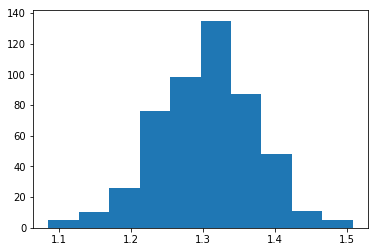

In [19]:
plt.hist(cad[:,0])

(array([  5.,  18.,  31.,  71., 101.,  94.,  94.,  52.,  23.,  12.]),
 array([2.34199821, 2.47927224, 2.61654627, 2.75382029, 2.89109432,
        3.02836835, 3.16564238, 3.30291641, 3.44019044, 3.57746446,
        3.71473849]),
 <a list of 10 Patch objects>)

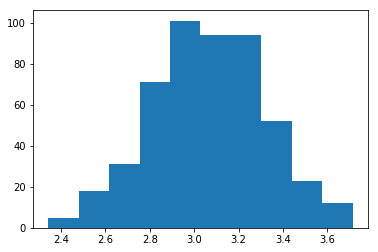

In [20]:
plt.hist(cad[:,1])